## Text Mining Brown Bag

### Introduction
The **Large Movie Review Dataset** (http://ai.stanford.edu/~amaas/data/sentiment/) is used to train several sentiment classification models.  This training dataset consists of 25,000 labeled movie reviews (50/50 positive and negative) as well as 50,000 unlabeled reviews.  The test dataset consists of an additional 25,000 labeled reviews.


*Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

## Import Data

In [2]:
def import_data():
    
    base_dir = "../data/aclImdb/"
    out = []
    for x in ["train", "test"]:
        for label in ["pos", "unsup", "neg"]:
            try:
                cur_dir = base_dir + x + "/" + label
                files = os.listdir(cur_dir)
                for file in files:
                    f = open(cur_dir +"/" + file, "r")
                    txt = f.readlines()
                    out.append((txt[0], x == "train", label))
                    f.close()
            except FileNotFoundError:
                pass
            
    out = pd.DataFrame(out)
    out.columns = ["review", "train", "label"]
    out.loc[out["label"]=="unsup", "label"] = np.nan
    out["target"] = out["label"] == "pos"
    return out

In [3]:
# Import all files
df = import_data()

df.head()

,review,train,label,target
0,For a movie that gets no respect there sure ar...,True,pos,True
1,Bizarre horror movie filled with famous faces ...,True,pos,True
2,"A solid, if unremarkable film. Matthau, as Ein...",True,pos,True
3,It's a strange feeling to sit alone in a theat...,True,pos,True
4,"You probably all already know this by now, but...",True,pos,True


In [4]:
df.to_csv("../data/review_data.csv", index=None)

## Bag of Words Model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [6]:
def model_accuracy(y_test, y_test_pred, model_desc=None):
    acc = accuracy_score(y_test, y_test_pred)
    print("%s Accuracy: %0.3f" %(model_desc, acc))
    return (model_desc, acc)

In [7]:
# Define test and training dataset
train_indx = (df["train"] == True) & (df["label"].notnull())
test_indx = (df["train"] == False) & (df["label"].notnull())

X_train = df[train_indx]["review"]
X_test = df[test_indx]["review"]

y_train = df[train_indx]["target"]
y_test = df[test_indx]["target"]

In [8]:
text_clf1 = Pipeline([('vect', CountVectorizer(lowercase=True, stop_words='english', min_df=100)),
                      ('clf', RandomForestClassifier(max_depth = 12))])

In [9]:
text_clf1.fit(X_train, y_train)
y_test_pred = text_clf1.predict(X_test)

In [10]:
acc_clf1 = model_accuracy(y_test, y_test_pred, "BOW")

BOW Accuracy: 0.780


## Tf-IDF Model

In [11]:
text_clf2 = Pipeline([('vect', CountVectorizer(lowercase=True, stop_words='english', min_df=100)),
                      ('tfidf', TfidfTransformer()),
                      ('clf', RandomForestClassifier(max_depth = 12))])

In [12]:
text_clf2.fit(X_train, y_train)
y_test_pred = text_clf2.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [13]:
acc_clf2 = model_accuracy(y_test, y_test_pred, "Tf-Idf")

Tf-Idf Accuracy: 0.782


## Tf-IDF Model w/ Bigrams

In [14]:
text_clf3 = Pipeline([('vect', CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 2), min_df=100)),
                      ('tfidf', TfidfTransformer()),
                      ('clf', RandomForestClassifier(max_depth = 12))])

In [15]:
text_clf3.fit(X_train, y_train)
y_test_pred = text_clf3.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [16]:
acc_clf3 = model_accuracy(y_test, y_test_pred, "Tf-Idf w/ Bigrams")

Tf-Idf w/ Bigrams Accuracy: 0.778


## Tf-IDF Model w/ Stemming

In [17]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer

class StemTokenize(object):
    def __init__(self):
        self.stemmer = PorterStemmer()
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc)]

In [18]:
s = StemTokenize()
print("Stemmed and Tokenized Review")
print(s(X_train[0]))

Stemmed and Tokenized Review
['for', 'a', 'movi', 'that', 'get', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memor', 'quot', 'list', 'for', 'thi', 'gem', '.', 'imagin', 'a', 'movi', 'where', 'joe', 'piscopo', 'is', 'actual', 'funni', '!', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', '.', 'the', 'moroni', 'charact', 'is', 'an', 'absolut', 'scream', '.', 'watch', 'for', 'alan', '``', 'the', 'skipper', "''", 'hale', 'jr.', 'as', 'a', 'polic', 'sgt', '.']


In [19]:
text_clf4 = Pipeline([('vect', CountVectorizer(lowercase=True, stop_words='english', tokenizer=StemTokenize(),
                                               min_df = 100)),
                      ('tfidf', TfidfTransformer()),
                      ('clf', RandomForestClassifier(max_depth = 12))])

In [20]:
text_clf4.fit(X_train.values, y_train)
y_test_pred = text_clf4.predict(X_test.values)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [21]:
acc_clf4 = model_accuracy(y_test, y_test_pred, "Tf-Idf w/ Stemming")

Tf-Idf w/ Stemming Accuracy: 0.780


## Creating Word Vectors

In [22]:
from nltk.tokenize import sent_tokenize
from gensim.models.word2vec import Word2Vec

In [23]:
def text_prep(x):
    # Take an input string and return a list of tokenized sentences
    
    # Convert string to lowercase
    x = x.lower()
    
    # Split string into list of sentences
    x = sent_tokenize(x)
    
    # Split each sentence into list of tokens
    x = [word_tokenize(s) for s in x]
    
    return x

In [24]:
print("Transformed Review:")
print(text_prep(X_train[0]))

Transformed Review:
[['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', '.'], ['imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', '!'], ['maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', '.'], ['the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', '.'], ['watch', 'for', 'alan', '``', 'the', 'skipper', "''", 'hale', 'jr.', 'as', 'a', 'police', 'sgt', '.']]


In [25]:
# Transform all reviews in training dataset
X_train = []

train = df[df["train"] == True]

for i in range(train.shape[0]):
    txt = train.iloc[i]["review"]
    X_train.extend(text_prep(txt))

In [26]:
model = Word2Vec(X_train, size = 300, workers = 3, min_count=100)

In [27]:
model.wv.most_similar("monster")

[('creature', 0.7423828840255737),
 ('giant', 0.6856991052627563),
 ('dinosaur', 0.6835554838180542),
 ('werewolf', 0.6724718809127808),
 ('shark', 0.663896918296814),
 ('mummy', 0.642347514629364),
 ('zombie', 0.6358975768089294),
 ('crocodile', 0.6309630870819092),
 ('demon', 0.6199178695678711),
 ('alien', 0.6015124917030334)]

In [28]:
model.wv.most_similar(positive=["woman", "king"], negative=["man"])

[('princess', 0.47555795311927795),
 ('queen', 0.47231391072273254),
 ('prince', 0.4667541980743408),
 ('jean', 0.4463273584842682),
 ('cinderella', 0.4378693103790283),
 ('elizabeth', 0.42998072504997253),
 ('stella', 0.4222850203514099),
 ('belle', 0.41974157094955444),
 ('kathryn', 0.41679638624191284),
 ('eva', 0.41167980432510376)]

In [29]:
model.wv.most_similar(positive=["woman", "uncle"], negative=["man"])

[('aunt', 0.7741267085075378),
 ('niece', 0.7316887378692627),
 ('fiancé', 0.7205795049667358),
 ('fiancée', 0.7176198363304138),
 ('boyfriend', 0.7094359993934631),
 ('sister', 0.7087077498435974),
 ('cousin', 0.7033664584159851),
 ('daughter', 0.7010114192962646),
 ('grandmother', 0.6979473829269409),
 ('neighbor', 0.6929489970207214)]

In [30]:
model.save("wordvec.model")

In [31]:
model = Word2Vec.load("wordvec.model")

# LSTM Model

In [32]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Embedding, Input, LSTM, Dense

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [33]:
word2index = {"<UNK>": 0}

for i, k in enumerate(model.wv.index2word):
    word2index[k] = i + 1
    
embedding = np.zeros((1, model.wv.syn0.shape[1]))
embedding = np.concatenate([embedding, model.wv.syn0], axis=0)

In [34]:
def index_lookup(x):
    try:
        return word2index[x]
    except KeyError:
        return word2index["<UNK>"]

def texts_to_sequence(texts, max_length = 100):
    out = []
    for x in texts:
        # Convert to lowercase
        x = x.lower()
        
        # Tokenize
        x = word_tokenize(x)
        
        x_seq = [index_lookup(t) for t in x]
        out.append(x_seq)
    return pad_sequences(out, maxlen=max_length)

In [35]:
MAX_LEN = 100

X_train = texts_to_sequence(df[(df["train"] == True) & (df["label"].notnull())]["review"], MAX_LEN)
X_test = texts_to_sequence(df[(df["train"] == False) & (df["label"].notnull())]["review"], MAX_LEN)

In [36]:
# Define embedding layer
d1, d2 = embedding.shape
embedding_layer = Embedding(d1, d2, weights = [embedding],
                            input_length=MAX_LEN,
                            trainable=False)

In [37]:
in1 = Input(shape=(MAX_LEN,))

x = embedding_layer(in1)
x = LSTM(10)(x)
x = Dense(10, activation="relu")(x)
out = Dense(1, activation="sigmoid")(x)

model = Model(in1, out)

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 300)          2839200   
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                12440     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,851,761
Trainable params: 12,561
Non-trainable params: 2,839,200
_________________________________________________________________


In [39]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop", metrics=["acc"])

model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
25000/25000 [==============================] - 23s 936us/step - loss: 0.5817 - acc: 0.6891
Epoch 2/10
25000/25000 [==============================] - 23s 902us/step - loss: 0.4794 - acc: 0.7779
Epoch 3/10
25000/25000 [==============================] - 22s 879us/step - loss: 0.4391 - acc: 0.8034
Epoch 4/10
25000/25000 [==============================] - 22s 877us/step - loss: 0.4119 - acc: 0.8217
Epoch 5/10
25000/25000 [==============================] - 22s 888us/step - loss: 0.3932 - acc: 0.8310
Epoch 6/10
25000/25000 [==============================] - 23s 924us/step - loss: 0.3769 - acc: 0.8403
Epoch 7/10
25000/25000 [==============================] - 22s 876us/step - loss: 0.3619 - acc: 0.8463
Epoch 8/10
25000/25000 [==============================] - 21s 853us/step - loss: 0.3507 - acc: 0.8534
Epoch 9/10
25000/25000 [==============================] - 23s 905us/step - loss: 0.3378 - acc: 0.8594
Epoch 10/10
25000/25000 [==============================] - 22s 868us/step - loss: 

In [40]:
y_test_pred =  model.predict(X_test).flatten()

In [41]:
acc_lstm = model_accuracy(y_test, y_test_pred > 0.5, "LSTM")

LSTM Accuracy: 0.839


## Model Performance Comparison

In [42]:
names, accuracy = zip(*(acc_clf1, acc_clf2, acc_clf3, acc_clf4, acc_lstm))

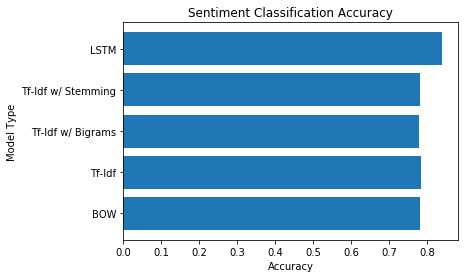

In [43]:
plt.title("Sentiment Classification Accuracy")
plt.barh(range(len(accuracy)), accuracy)
plt.yticks(range(len(names)), names)
plt.ylabel("Model Type")
plt.xlabel("Accuracy")
plt.show()